In [90]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt

#from dotenv import load_dotenv
#load_dotenv()

%matplotlib inline

from MCForecastTools import MCSimulation

In [91]:
os.getcwd()

'/Users/adnanquaderi/Desktop/Penn/Project_1_AQ'

### Read and process SPY ETF Price Data

In [92]:
# Reading SPY price history
spy_price_csv = Path("SPY.csv")
spy_price = pd.read_csv(
    spy_price_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
spy_price = spy_price.sort_index()
spy_price = spy_price.dropna()
spy_price["Close"] = spy_price["Close"].astype("float")
spy_price = spy_price.rename(columns={"Close": "close"})
spy_price.head(2)

close
Date                       
2015-01-02 16:00:00  205.43
2015-01-05 16:00:00  201.76

In [93]:
# Reset index in SPY data
spy_price_close =  spy_price.reset_index()
spy_price_close["Date"] = spy_price_close["Date"].dt.date
spy_price_close.head(2)

Date   close
0  2015-01-02  205.43
1  2015-01-05  201.76

In [94]:
#Prep SPY prices for input to Monte Carlo function (Multi-index, 2 level for compatability with MC function)

spy_price_MC = spy_price_close
spy_price_MC.set_index("Date", drop=True)
newcols = [
    ("Date", ""), 
    ("SPY", "close")
]
spy_price_MC.columns = pd.MultiIndex.from_tuples(newcols)
spy_price_MC = spy_price_MC.set_index(("Date"))
spy_price_MC 

SPY
             close
Date              
2015-01-02  205.43
2015-01-05  201.76
2015-01-06  199.82
2015-01-07  202.31
2015-01-08  205.90
...            ...
2021-10-25  455.55
2021-10-26  455.96
2021-10-27  453.94
2021-10-28  458.32
2021-10-29  459.25

[1720 rows x 1 columns]

### Read and process Bitcoin price data

In [95]:
# Reading BTC price history

btc_price_csv = Path("Bitcoin2.csv")
btc_price = pd.read_csv(
    btc_price_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
btc_price = btc_price.sort_index()
btc_price = btc_price.dropna()
btc_price["Close"] = btc_price["Close"].astype("float")
btc_price = btc_price.rename(columns={"Close": "close"})
btc_price.head(2)

close
Date                       
2015-11-19 23:58:00  326.41
2015-11-20 23:58:00  322.39

In [96]:
# Reset index in BTC data
btc_price_close =  btc_price.reset_index()
btc_price_close["Date"] = btc_price_close["Date"].dt.date
btc_price_close.head(2)

Date   close
0  2015-11-19  326.41
1  2015-11-20  322.39

In [97]:
#Prep BTC prices for input to Monte Carlo function (Multi-index, 2 level for compatability with MC function)

btc_price_MC = btc_price_close
btc_price_MC.set_index("Date", drop=True)
newcols = [
    ("Date", ""), 
    ("BTC", "close")
]
btc_price_MC.columns = pd.MultiIndex.from_tuples(newcols)
btc_price_MC = btc_price_MC.set_index(("Date"))
btc_price_MC

BTC
               close
Date                
2015-11-19    326.41
2015-11-20    322.39
2015-11-21    327.00
2015-11-22    323.71
2015-11-23    323.00
...              ...
2021-10-27  58455.40
2021-10-28  60608.10
2021-10-29  62258.00
2021-10-30  61892.40
2021-10-31  61343.60

[2174 rows x 1 columns]

### Read and process Ethereum price data

In [98]:
# Reading Ethereum prices from csv file
eth_price_csv = Path("Ethereum.csv")
eth_price = pd.read_csv(
    eth_price_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_price = eth_price.sort_index()
eth_price = eth_price.dropna()
eth_price["Close"] = eth_price["Close"].astype("float")
eth_price = eth_price.rename(columns={"Close": "close"})
eth_price.head(5)

close
Date                      
2016-10-14 23:58:00  11.92
2016-10-15 23:58:00  11.95
2016-10-16 23:58:00  11.95
2016-10-17 23:58:00  11.96
2016-10-18 23:58:00  12.54

In [99]:
#Reset ethereum data index
eth_price_close = eth_price.reset_index()
eth_price_close["Date"] = eth_price_close["Date"].dt.date
eth_price_close.head(2)

Date  close
0  2016-10-14  11.92
1  2016-10-15  11.95

In [100]:
#Prep ETH price for input to Monte Carlo function (Multi-index, 2 level for compatability with MC function)

eth_price_MC = eth_price_close
eth_price_MC.set_index("Date", drop=True)
newcols = [
    ("Date", ""), 
    ("ETH", "close")
]
eth_price_MC.columns = pd.MultiIndex.from_tuples(newcols)
eth_price_MC = eth_price_MC.set_index(("Date"))
eth_price_MC 

ETH
              close
Date               
2016-10-14    11.92
2016-10-15    11.95
2016-10-16    11.95
2016-10-17    11.96
2016-10-18    12.54
...             ...
2021-10-27  3925.44
2021-10-28  4288.26
2021-10-29  4415.04
2021-10-30  4325.43
2021-10-31  4292.06

[1844 rows x 1 columns]

### Compute Daily Returns

In [101]:
# Get SPY Daily Returns

spy_returns = spy_price.pct_change().dropna()
spy_returns.head(5)

close
Date                         
2015-01-05 16:00:00 -0.017865
2015-01-06 16:00:00 -0.009615
2015-01-07 16:00:00  0.012461
2015-01-08 16:00:00  0.017745
2015-01-09 16:00:00 -0.008014

In [102]:
btc_returns = btc_price.pct_change().dropna()
btc_returns.head(5)

close
Date                         
2015-11-20 23:58:00 -0.012316
2015-11-21 23:58:00  0.014299
2015-11-22 23:58:00 -0.010061
2015-11-23 23:58:00 -0.002193
2015-11-24 23:58:00 -0.006192

In [103]:
# Get Ethereum Daily Returns

eth_returns = eth_price.pct_change().dropna().copy()
eth_returns.head(5)

close
Date                         
2016-10-15 23:58:00  0.002517
2016-10-16 23:58:00  0.000000
2016-10-17 23:58:00  0.000837
2016-10-18 23:58:00  0.048495
2016-10-19 23:58:00 -0.042265

## Plot Daily Returns

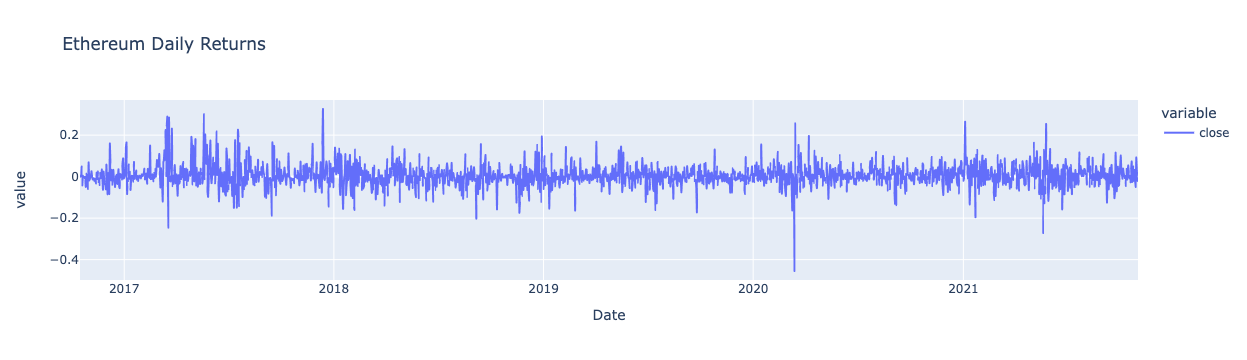

In [104]:
# Plot Ethereum Daily Returns using plotly


px.line(eth_returns, title="Ethereum Daily Returns")

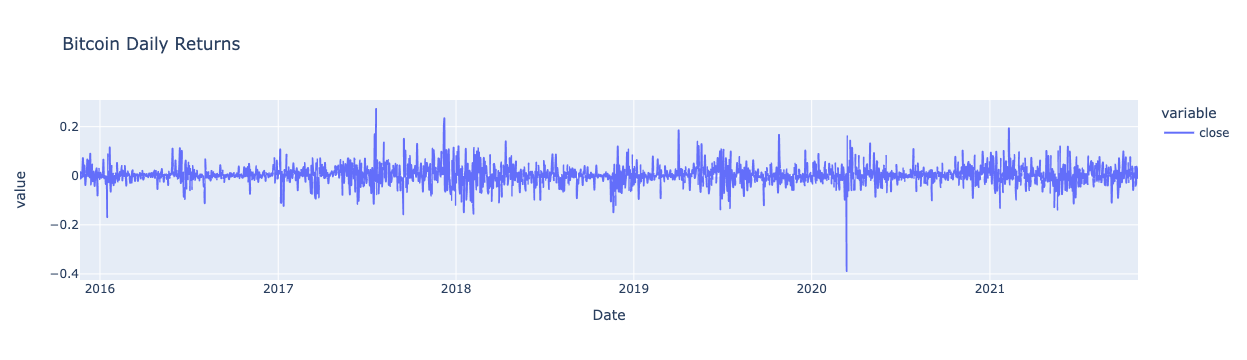

In [149]:
# Plot Bitcoin Daily Returns using plotly


px.line(btc_returns, title="Bitcoin Daily Returns")

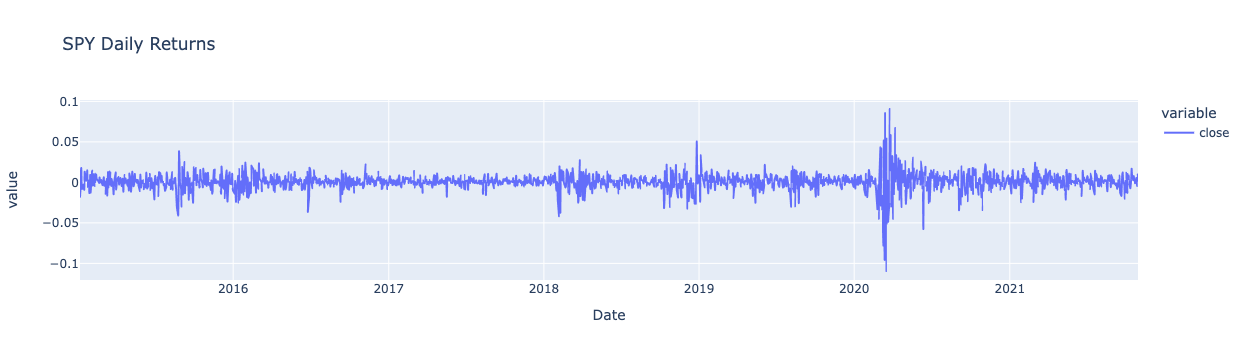

In [106]:
#Plot SPY Daily Returns using plotly

px.line(spy_returns, title="SPY Daily Returns")

### Prepping data for pandas dataframe concatenation

In [107]:
# Prepping SPY data for pandas dataframe Concatenation

spy_returns_1 = spy_returns.rename(columns={"close": "SPY"})
spy_returns_1 = spy_returns_1.reset_index()
spy_returns_1["Date"] = spy_returns_1["Date"].dt.date
spy_returns_1 = spy_returns_1.set_index("Date")
spy_returns_1.head(2)

SPY
Date                
2015-01-05 -0.017865
2015-01-06 -0.009615

In [108]:
# Prepping BTC data for pandas dataframe Concatenation

btc_returns_1 = btc_returns.rename(columns={"close": "BTC"})
btc_returns_1 = btc_returns_1.reset_index()
btc_returns_1["Date"] = btc_returns_1["Date"].dt.date
btc_returns_1 = btc_returns_1.set_index("Date")
btc_returns_1.head(2)

BTC
Date                
2015-11-20 -0.012316
2015-11-21  0.014299

In [111]:
# Prepping Ethereum data for pandas dataframe Concatenation

eth_returns_1 = eth_returns.rename(columns={"close": "Ethereum"})
eth_returns_1 = eth_returns_1.reset_index()
eth_returns_1["Date"] = eth_returns_1["Date"].dt.date
eth_returns_1 = eth_returns_1.set_index("Date")
eth_returns_1.head(3)

Ethereum
Date                
2016-10-15  0.002517
2016-10-16  0.000000
2016-10-17  0.000837

In [150]:
#BLOCK of code used to Concatenate daily return data :  SPY, Ethereum, Bitcoin


spy_eth_btc_combo_returns = pd.concat([eth_returns_1, btc_returns_1, spy_returns_1], axis=1, join="outer")
spy_eth_btc_combo_returns.dropna(inplace=True)
spy_eth_btc_combo_returns.head(5)


Ethereum       BTC       SPY
Date                                    
2016-10-17  0.000837 -0.003676 -0.003472
2016-10-18  0.048495 -0.006958  0.006262
2016-10-19 -0.042265 -0.008377  0.002667
2016-10-20  0.004163 -0.002763 -0.001867
2016-10-21 -0.000829  0.004426  0.000468

In [151]:
#BLOCK of code used to Concatenate daily return data :  SPY, Ethereum


spy_eth_combo_returns = pd.concat([eth_returns_1, spy_returns_1], axis=1, join="outer")
spy_eth_combo_returns.dropna(inplace=True)
spy_eth_combo_returns.head(5)


Ethereum       SPY
Date                          
2016-10-17  0.000837 -0.003472
2016-10-18  0.048495  0.006262
2016-10-19 -0.042265  0.002667
2016-10-20  0.004163 -0.001867
2016-10-21 -0.000829  0.000468

## Ethereum and SPY Blended Portfolios:
Aggressive, Moderate, and Risk Averse

In [113]:
# Blended Portfolio Processing

eth_weight = {
    "Risk_Averse" : 0.02,
    "Moderate" : 0.05,
    "Aggressive" : 0.25
}

print("SPY weight " ,1 - eth_weight['Moderate'])

print("ETH weight ", eth_weight['Moderate'])

SPY weight  0.95
ETH weight  0.05


In [118]:
# Aggressive Portfolio of SPY & Ethereum  (High Crypto Allocation)

spy_eth_btc_combo_returns['Aggressive'] = spy_eth_combo_returns['Ethereum'] * eth_weight['Aggressive'] + spy_eth_combo_returns['SPY'] * (1- eth_weight['Aggressive'])



In [119]:
# Moderate Portfolio of SPY & Ethereum (Medium Crypto Allocation)

spy_eth_btc_combo_returns['Moderate'] = spy_eth_combo_returns['Ethereum'] * eth_weight['Moderate'] + spy_eth_combo_returns['SPY'] * (1- eth_weight['Moderate'])



In [120]:
# Conservative Portfolio of SPY & Ethereum (Low Crypto Allocation)

spy_eth_btc_combo_returns['Risk_Averse'] = spy_eth_combo_returns['Ethereum'] * eth_weight['Risk_Averse'] + spy_eth_combo_returns['SPY'] * (1- eth_weight['Risk_Averse'])



In [121]:
spy_eth_btc_combo_returns.head(3)

Ethereum       BTC       SPY  Aggressive  Moderate  Risk_Averse
Date                                                                       
2016-10-17  0.000837 -0.003676 -0.003472   -0.002395 -0.003257    -0.003386
2016-10-18  0.048495 -0.006958  0.006262    0.016821  0.008374     0.007107
2016-10-19 -0.042265 -0.008377  0.002667   -0.008566  0.000421     0.001769

## Box Plots of Daily Returns
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<AxesSubplot:title={'center':'SPY, Ethereum, and Portfolio Daily Return Box Plots'}>

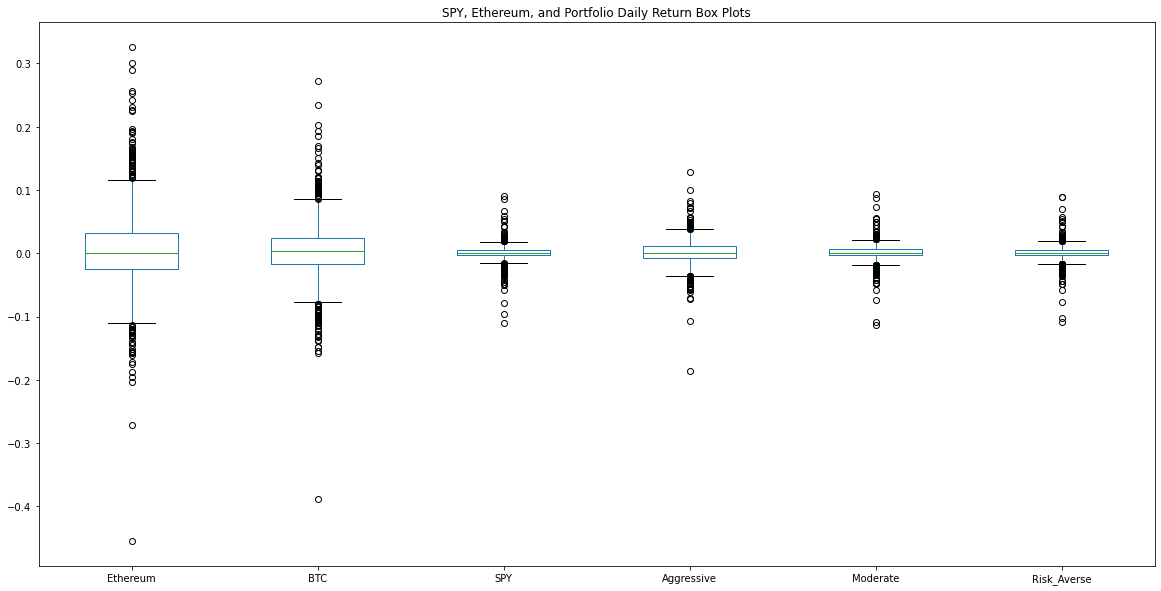

In [122]:
# Box Plot of Daily Returns 

spy_eth_btc_combo_returns.plot.box(figsize=(20, 10), title="SPY, Ethereum, and Portfolio Daily Return Box Plots") 


## Rolling 1y Volatility Plots (Using standard deviation function)

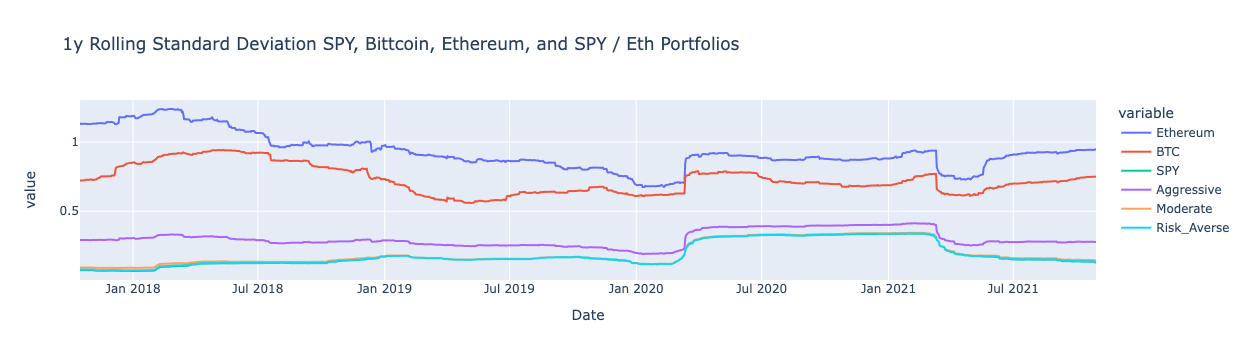

In [123]:
# SPY, Ethereum, Portfolio Rolling 1y Volatility (std)

spy_eth_btc_combo_returns_1 = spy_eth_btc_combo_returns.std() * np.sqrt(252)
spy_eth_btc_combo_returns_1 = (np.sqrt(252)*spy_eth_btc_combo_returns).rolling(window=252).std().dropna()


px.line(spy_eth_btc_combo_returns_1, title="1y Rolling Standard Deviation SPY, Bitcoin, Ethereum, and SPY / Eth Portfolios")

## Cumulative Return Plots

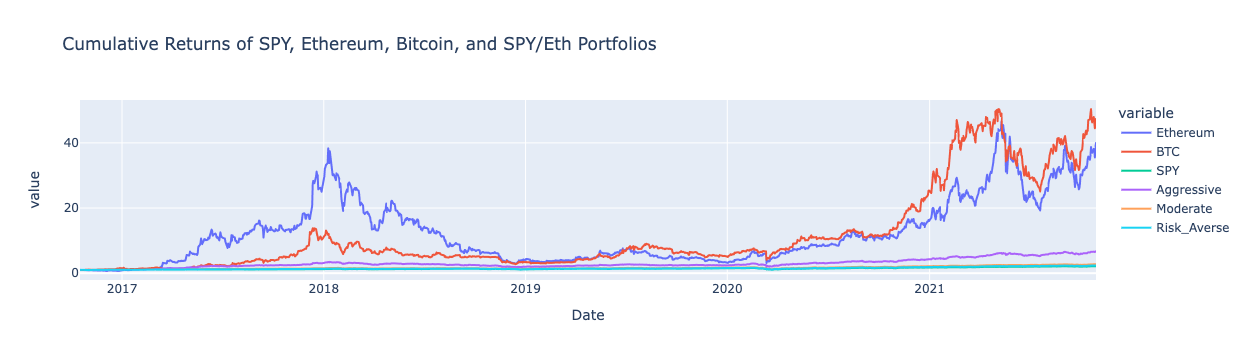

In [124]:
# Cumulative Return calculation and plot

spy_eth_btc_combo_cum_returns_1 = (1+spy_eth_btc_combo_returns).cumprod()
#spy_eth_btc_combo_cum_returns_1 = spy_eth_combo_returns).rolling(window=252).std().dropna()


px.line(spy_eth_btc_combo_cum_returns_1, title="Cumulative Returns of SPY, Ethereum, Bitcoin, and SPY/Eth Portfolios")




## Rolling 3m Beta Plots

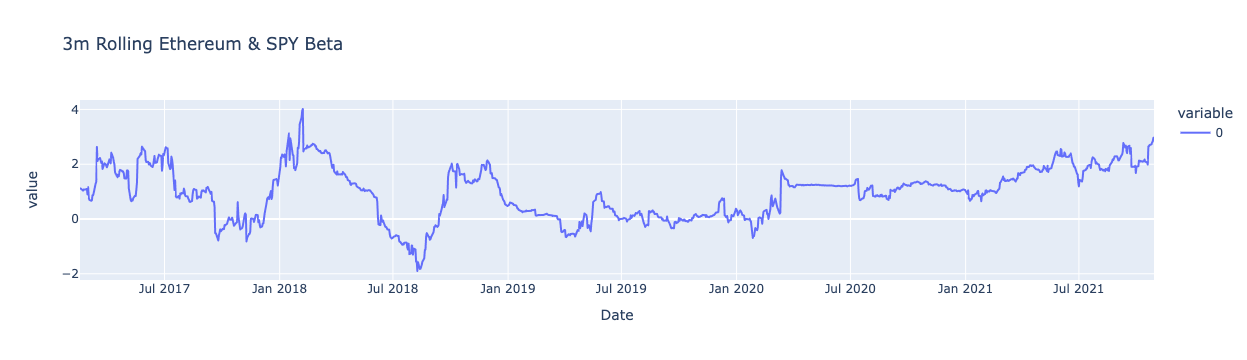

In [126]:
# Calculate Rolling 3 month Covariances against SPY

covariance_eth = spy_eth_btc_combo_returns["Ethereum"].rolling(window=85).cov(spy_eth_btc_combo_returns["SPY"]).dropna()
covariance_btc = spy_eth_btc_combo_returns["BTC"].rolling(window=85).cov(spy_eth_btc_combo_returns["SPY"]).dropna()


covariance_aggressive= spy_eth_btc_combo_returns["Aggressive"].rolling(window=85).cov(spy_eth_btc_combo_returns["SPY"]).dropna()
covariance_moderate= spy_eth_btc_combo_returns["Moderate"].rolling(window=85).cov(spy_eth_btc_combo_returns["SPY"]).dropna()
covariance_risk_averse= spy_eth_btc_combo_returns["Risk_Averse"].rolling(window=85).cov(spy_eth_btc_combo_returns["SPY"]).dropna()

# Calculate Rolling 3 month variance of S&P 
variance_spy = spy_eth_btc_combo_returns["SPY"].rolling(window=85).var().dropna()


# Calculate Rolling Beta

beta_eth = covariance_eth / variance_spy
beta_btc = covariance_btc / variance_spy

beta_aggressive = covariance_aggressive / variance_spy
beta_moderate = covariance_moderate / variance_spy
beta_risk_averse= covariance_risk_averse / variance_spy

# Plot selected beta trend

px.line(beta_eth, title="3m Rolling Ethereum & SPY Beta")


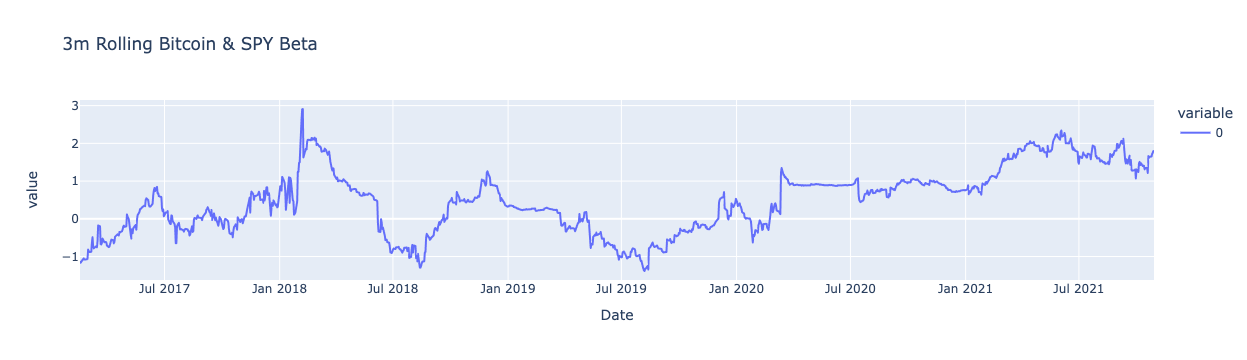

In [127]:
px.line(beta_btc, title="3m Rolling Bitcoin & SPY Beta")


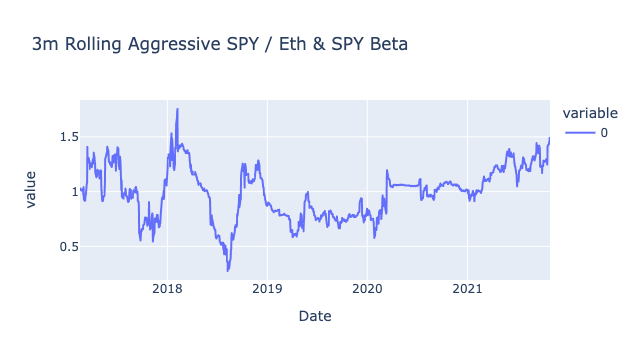

In [152]:
px.line(beta_aggressive, title="3m Rolling Aggressive SPY / Eth & SPY Beta")

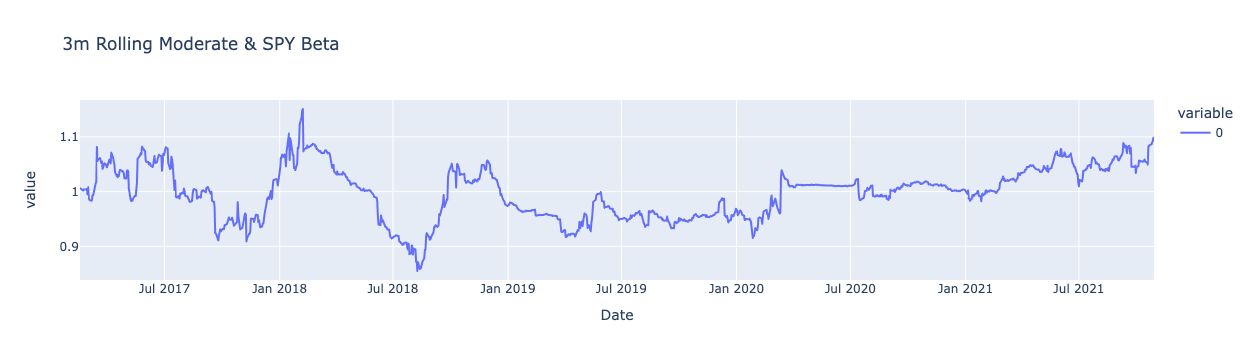

In [129]:
px.line(beta_moderate, title="3m Rolling Moderate & SPY Beta")

## ------------  1y Forward Projection - Ethereum :  Monte Carlo # 1 -----------------

In [130]:
# Create Monte Carlo function object

num_sims = 100
MC_Eth_new= MCSimulation(
    portfolio_data = eth_price_MC,
    num_simulation = num_sims,
    num_trading_days = 252*1
)

In [131]:
# Run Monte Carlo simulations to forecast one year daily returns

MC_Eth_new.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.000640  1.050491  0.885299  0.986171  0.990046  0.969475  1.133088   
2    0.929025  1.042090  0.868827  0.960883  0.972673  0.985717  1.050617   
3    1.013585  1.038480  0.904325  0.929854  0.926071  0.995808  0.980927   
4    1.020665  1.138870  0.863880  0.871981  0.927698  0.922426  1.108047   
..        ...       ...       ...       ...       ...       ...       ...   
248  2.997158  1.252525  3.553555  2.063804  1.072706  1.077397  2.732172   
249  2.691038  1.327842  3.711438  2.095219  1.069871  1.044806  2.564074   
250  2.660141  1.332408  3.785231  2.018000  0.984165  1.057642  2.354159   
251  2.544253  1.300549  3.563358  1.961613  0.959521  1.012103  2.483053   
252  2.494477  1.182609  3.620085  1.995708  1.053119  1.008607  2.579010   

           7         8         9   ...        90        91        92  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.969714  0.974824  1.020037  ...  1.159419  0.962658  1.023381   
2    1.053288  1.023727  1.038115  ...  1.123942  0.919338  1.023167   
3    1.081218  1.003267  0.999467  ...  1.073175  0.923213  1.002322   
4    1.166547  1.099381  1.002437  ...  1.105756  0.929926  1.021154   
..        ...       ...       ...  ...       ...       ...       ...   
248  6.437750  1.264733  2.605228  ...  1.844591  1.604321  1.487302   
249  6.117158  1.318457  2.513877  ...  1.975545  1.551018  1.569534   
250  6.343422  1.248154  2.748737  ...  2.152047  1.552241  1.439678   
251  6.661851  1.236088  2.887032  ...  2.166072  1.603595  1.395134   
252  6.927735  1.095357  2.705769  ...  2.301740  1.534338  1.343476   

           93        94         95        96        97        98        99  
0    1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.089970  0.974087   1.003640  1.070869  1.056753  1.009986  0.890008  
2    1.022572  0.889512   1.064091  1.000385  1.049795  1.086933  0.876208  
3    0.950303  0.832065   1.048434  0.973848  1.078050  1.073040  0.811778  
4    0.928632  0.806221   1.105603  0.968473  1.045539  1.126306  0.823710  
..        ...       ...        ...       ...       ...       ...       ...  
248  7.114789  1.178366  10.019200  2.121262  1.318581  1.125558  1.902330  
249  7.971759  1.136455   9.962481  2.165796  1.409573  1.212860  1.796115  
250  7.289480  1.167776  10.140504  2.173268  1.447397  1.262697  1.829554  
251  6.854751  1.104705  10.163170  2.219169  1.534407  1.367731  1.815930  
252  6.728806  1.167946   9.712148  2.217720  1.621244  1.385939  2.073491  

[253 rows x 100 columns]

In [132]:
# Compute summary statistics from the simulated daily returns

simulated_eth_returns_data = {
    "Mean": list(MC_Eth_new.simulated_return.mean(axis=1)),
    "Median": list(MC_Eth_new.simulated_return.median(axis=1)),
    "Min": list(MC_Eth_new.simulated_return.min(axis=1)),
    "Max": list(MC_Eth_new.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics

df_simulated_eth_returns = pd.DataFrame(simulated_eth_returns_data)

# Display sample data

df_simulated_eth_returns.head()



Mean    Median       Min       Max
0  1.000000  1.000000  1.000000  1.000000
1  1.006886  1.004856  0.882257  1.159419
2  1.005493  1.009684  0.811013  1.247883
3  1.009084  1.014861  0.782851  1.282733
4  1.012486  1.011941  0.779268  1.333269

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Ethereum Over the Next Year'}>

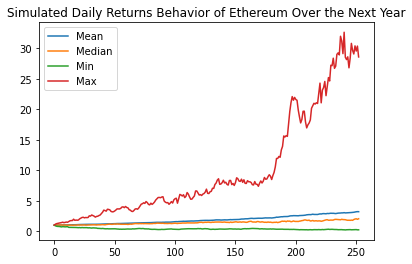

In [133]:
# Plot simulated returns over next year


df_simulated_eth_returns.plot(title="Simulated Daily Returns Behavior of Ethereum Over the Next Year")


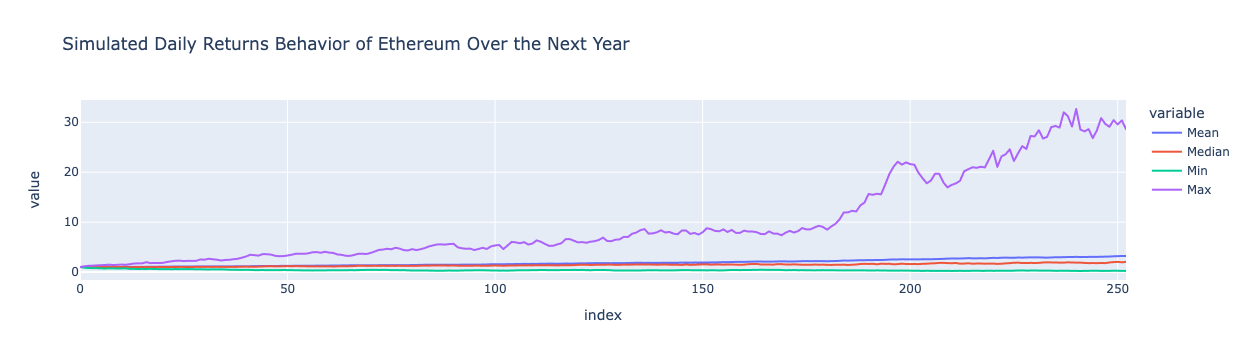

In [134]:
# Plot simulated returns over next year using plotly

px.line(df_simulated_eth_returns, title="Simulated Daily Returns Behavior of Ethereum Over the Next Year")



In [135]:
# Fetch summary statistics from the Monte Carlo simulation results

eth_tbl = MC_Eth_new.summarize_cumulative_return()

# Print summary statistics
print(eth_tbl)


count           100.000000
mean              3.203837
std               4.126144
min               0.228341
25%               1.008443
50%               2.043257
75%               3.371877
max              28.600174
95% CI Lower      0.474079
95% CI Upper     12.970063
Name: 252, dtype: float64


In [136]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Ethereum

eth_ci_lower = round(eth_tbl[8]*10000,2)
eth_ci_upper = round(eth_tbl[9]*10000,2)

# Print results

print(f"There is a 95% chance that an initial investment of $10,000 in Ethereum"
      f" over the next year will end within in the range of"
      f" ${eth_ci_lower} and ${eth_ci_upper}.")


There is a 95% chance that an initial investment of $10,000 in Ethereum over the next year will end within in the range of $4740.79 and $129700.63.


In [137]:
# Set initial investment for Ethereum

eth_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money

eth_cumulative_pnl = eth_initial_investment * df_simulated_eth_returns

# Display sample data
eth_cumulative_pnl.head()


Mean        Median           Min           Max
0  10000.000000  10000.000000  10000.000000  10000.000000
1  10068.859215  10048.562452   8822.568096  11594.191641
2  10054.932213  10096.837019   8110.128752  12478.826192
3  10090.840441  10148.608288   7828.510048  12827.327789
4  10124.860883  10119.410605   7792.678538  13332.690776

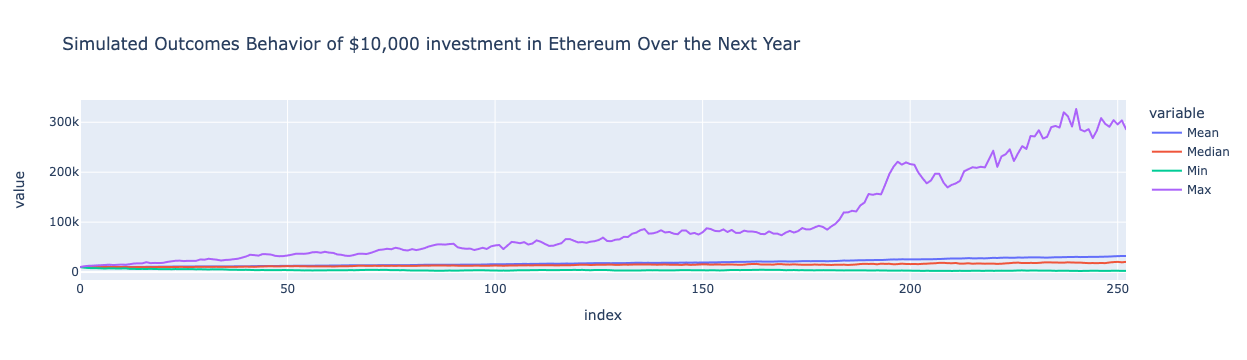

In [138]:
 # Use the 'plot' function to create a chart of the simulated profits/losses
    
px.line(eth_cumulative_pnl, title="Simulated Outcomes Behavior of $10,000 investment in Ethereum Over the Next Year")


## ----- 1y Forward Projection - SPY :  Monte Carlo # 2 ------------

In [38]:
# Create Monte Carlo function object for SPY

num_sims_2 = 100

MC_SPY_new= MCSimulation(
    portfolio_data = spy_price_MC,
    num_simulation = num_sims_2,
    num_trading_days = 252*1
)

In [39]:
# Run Monte Carlo simulations to forecast one year daily returns for SPY

MC_SPY_new.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.989423  1.011144  0.982785  0.988427  1.004131  1.000518  0.996002   
2    1.000736  1.008879  0.998536  0.982824  0.998452  1.005709  0.990390   
3    0.998904  1.028281  1.013317  0.999679  0.991072  1.008099  0.980658   
4    1.001129  1.029154  1.005722  0.990801  0.999819  0.994413  0.970783   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.056952  1.033158  1.026444  1.329181  1.277788  1.387881  0.839764   
249  1.063680  1.044471  1.026793  1.319837  1.280086  1.390089  0.848345   
250  1.088664  1.047966  1.025257  1.330788  1.274861  1.386683  0.850089   
251  1.091199  1.039981  1.025501  1.353762  1.271588  1.388600  0.847099   
252  1.084902  1.041062  1.020303  1.341981  1.257573  1.397633  0.844424   

           7         8         9   ...        90        91        92  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.993335  0.995774  0.986311  ...  0.998522  1.000827  0.997019   
2    0.989426  1.004546  0.992625  ...  0.996650  0.996654  1.000022   
3    0.994919  0.995098  0.997702  ...  0.989101  0.996733  1.019457   
4    0.994785  0.989607  0.983771  ...  0.986334  0.984904  1.014573   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.864453  0.901487  1.161303  ...  1.140788  1.081352  1.093515   
249  0.867474  0.896449  1.173108  ...  1.157064  1.095498  1.100905   
250  0.863983  0.884741  1.182214  ...  1.149872  1.103147  1.104800   
251  0.871959  0.882885  1.169889  ...  1.157456  1.109531  1.105601   
252  0.876959  0.876722  1.174492  ...  1.167191  1.092565  1.123453   

           93        94        95        96        97        98        99  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.988571  1.007184  1.018807  0.984246  0.981470  1.000367  0.991832  
2    0.981867  1.002806  1.012846  0.995284  0.986996  0.996423  0.981286  
3    0.963742  0.996093  1.028250  1.000167  0.983614  1.006489  0.965458  
4    0.981323  1.005787  1.009510  1.011452  0.994713  1.002274  0.977516  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.106541  1.043326  1.100650  1.137923  1.289130  0.972430  1.210578  
249  1.104239  1.039838  1.097028  1.136989  1.270910  0.966888  1.243842  
250  1.106768  1.044264  1.105124  1.125333  1.264903  0.966463  1.257005  
251  1.106124  1.034761  1.096730  1.095656  1.253569  0.978985  1.263685  
252  1.099588  1.030403  1.083299  1.097574  1.220923  0.997908  1.251840  

[253 rows x 100 columns]

In [51]:
# Compute summary statistics from the simulated daily returns for SPY

simulated_spy_returns_data = {
    "Mean": list(MC_SPY_new.simulated_return.mean(axis=1)),
    "Median": list(MC_SPY_new.simulated_return.median(axis=1)),
    "Min": list(MC_SPY_new.simulated_return.min(axis=1)),
    "Max": list(MC_SPY_new.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for SPY

df_simulated_spy_returns = pd.DataFrame(simulated_spy_returns_data)

# Display sample data for SPY

df_simulated_spy_returns.head(10)



Mean    Median       Min       Max
0  1.000000  1.000000  1.000000  1.000000
1  0.997703  0.998452  0.976289  1.022667
2  0.995894  0.995161  0.970563  1.039756
3  0.996021  0.993628  0.963663  1.041058
4  0.994236  0.991365  0.949376  1.043953
5  0.996918  0.998453  0.951215  1.065125
6  0.997190  1.001335  0.931723  1.061474
7  0.995749  0.999999  0.934322  1.062548
8  0.993654  0.995437  0.908237  1.070032
9  0.995165  0.993202  0.924763  1.076406

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of SPY Over the Next Year'}>

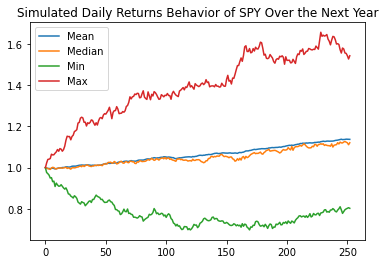

In [52]:
# Plot simulated returns over next year for SPY

df_simulated_spy_returns.plot(title="Simulated Daily Returns Behavior of SPY Over the Next Year")


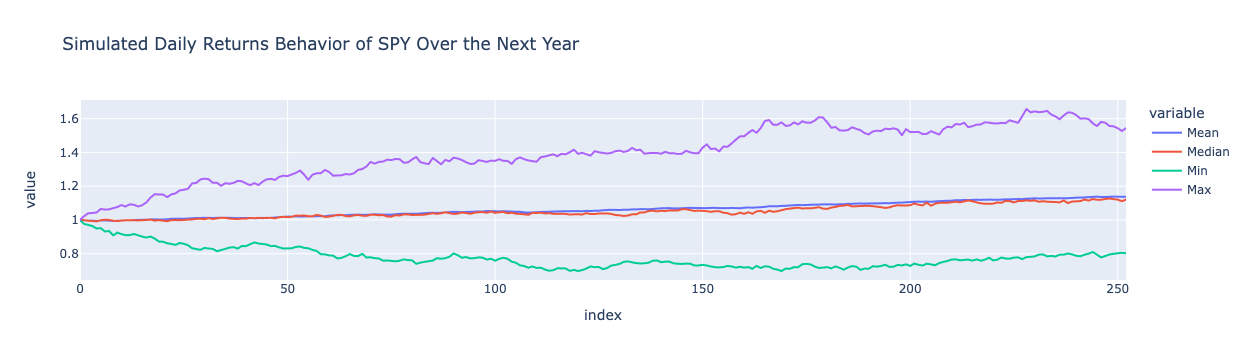

In [53]:
# Plot simulated returns over next year using plotly for SPY

px.line(df_simulated_spy_returns, title="Simulated Daily Returns Behavior of SPY Over the Next Year")



In [54]:
# Fetch summary statistics from the Monte Carlo simulation results for SPY

spy_tbl = MC_SPY_new.summarize_cumulative_return()

# Print summary statistics
print(spy_tbl)


count           100.000000
mean              1.137281
std               0.181706
min               0.802290
25%               1.005553
50%               1.120654
75%               1.257906
max               1.543415
95% CI Lower      0.826794
95% CI Upper      1.503473
Name: 252, dtype: float64


In [55]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in SPY

spy_ci_lower = round(spy_tbl[8]*10000,2)
spy_ci_upper = round(spy_tbl[9]*10000,2)

# Print results

print(f"There is a 95% chance that an initial investment of $10,000 in SPY"
      f" over the next year will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")


There is a 95% chance that an initial investment of $10,000 in SPY over the next year will end within in the range of $8267.94 and $15034.73.


In [57]:
# Set initial investment for SPY

spy_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money

spy_cumulative_pnl = spy_initial_investment * df_simulated_spy_returns

# Display sample data
spy_cumulative_pnl.head()


Mean        Median           Min           Max
0  10000.000000  10000.000000  10000.000000  10000.000000
1   9977.029920   9984.520493   9762.887143  10226.672760
2   9958.938570   9951.613061   9705.633382  10397.560432
3   9960.208886   9936.284808   9636.632854  10410.579009
4   9942.360587   9913.651990   9493.762171  10439.532951

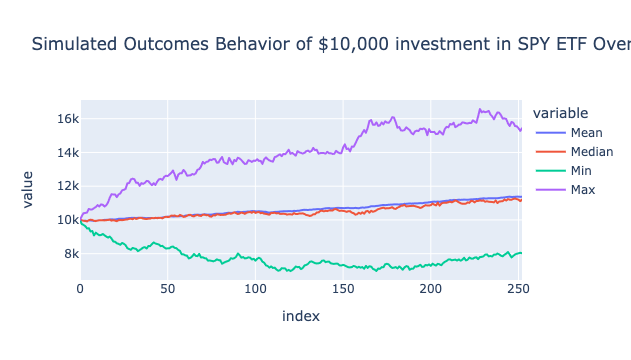

In [62]:
 # Use the 'plot' function to create a chart of the simulated profits/losses
    
px.line(spy_cumulative_pnl, title="Simulated Outcomes Behavior of $10,000 investment in SPY ETF Over the Next Year")



## ------------- 1y Forward Projection - Bitcoin :  Monte Carlo #3 ------------------------

In [140]:
# Create Monte Carlo function object for SPY

num_sims_3 = 100

MC_BTC_new= MCSimulation(
    portfolio_data = btc_price_MC,
    num_simulation = num_sims_3,
    num_trading_days = 252*1
)

In [141]:
# Run Monte Carlo simulations to forecast one year daily returns for SPY

MC_BTC_new.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.989441  1.016780  0.967989  1.090568  0.948978  0.988061  0.999085   
2    1.016892  1.009846  1.039516  1.081505  0.952942  1.041121  1.021604   
3    0.986124  0.999319  1.062735  1.078812  0.958991  1.006812  1.004200   
4    0.957567  0.957112  1.050219  1.105940  0.984063  0.959881  1.008733   
..        ...       ...       ...       ...       ...       ...       ...   
248  2.229676  2.876216  1.852951  2.678699  2.302519  2.280189  1.552771   
249  2.242412  2.940706  1.781419  2.645417  2.304146  2.155156  1.600471   
250  2.127000  2.849468  1.756866  2.729544  2.318092  2.077516  1.564830   
251  2.063645  2.857134  1.693409  2.744037  2.307679  2.145602  1.587087   
252  1.989347  2.708059  1.677550  2.643579  2.237450  2.161812  1.576876   

           7         8         9   ...        90        91        92  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.994939  0.984259  0.967895  ...  1.071026  1.026869  1.023360   
2    0.966825  1.032909  0.969501  ...  1.100732  1.005304  1.055441   
3    1.005100  1.052322  1.027690  ...  1.081237  0.985216  1.126569   
4    1.053837  1.060907  1.045110  ...  1.100575  1.010332  1.117362   
..        ...       ...       ...  ...       ...       ...       ...   
248  5.240321  2.148512  1.311692  ...  2.002961  1.868284  1.685740   
249  5.215378  2.129860  1.352119  ...  2.007264  1.840554  1.612086   
250  4.998418  1.999632  1.386291  ...  2.016518  1.854201  1.578188   
251  5.080214  2.103148  1.330139  ...  1.997728  1.871633  1.541478   
252  4.982506  2.149720  1.293735  ...  2.096621  1.680471  1.624259   

           93        94        95        96        97        98        99  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.995509  0.975783  0.997217  0.990788  1.025986  0.995908  0.957424  
2    1.052770  1.023612  1.020108  0.917458  0.992173  1.043844  0.943698  
3    1.106420  0.989074  1.037043  0.904976  0.997602  1.046507  0.911855  
4    1.147048  1.064145  0.990416  0.929816  1.039508  1.047376  0.913826  
..        ...       ...       ...       ...       ...       ...       ...  
248  2.749968  1.506543  1.824040  0.652587  0.680858  1.348512  3.623520  
249  2.828172  1.474727  1.823430  0.614316  0.655626  1.318803  3.666119  
250  2.801466  1.421295  1.736763  0.586313  0.659390  1.280670  3.810479  
251  2.777439  1.577439  1.871430  0.572535  0.602371  1.302038  3.601597  
252  2.866981  1.617310  1.890471  0.581944  0.628867  1.337334  3.562726  

[253 rows x 100 columns]

In [142]:
# Compute summary statistics from the simulated daily returns for Bitcoin

simulated_btc_returns_data = {
    "Mean": list(MC_BTC_new.simulated_return.mean(axis=1)),
    "Median": list(MC_BTC_new.simulated_return.median(axis=1)),
    "Min": list(MC_BTC_new.simulated_return.min(axis=1)),
    "Max": list(MC_BTC_new.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for SPY

df_simulated_btc_returns = pd.DataFrame(simulated_btc_returns_data)

# Display sample data for SPY

df_simulated_btc_returns.head(10)



Mean    Median       Min       Max
0  1.000000  1.000000  1.000000  1.000000
1  0.999367  0.995023  0.885852  1.111260
2  1.009600  1.009312  0.868015  1.142135
3  1.011066  1.011567  0.805689  1.247776
4  1.014341  1.008599  0.760411  1.279115
5  1.018985  1.013165  0.722064  1.306859
6  1.018449  1.009549  0.716695  1.264869
7  1.018851  1.003392  0.734186  1.291965
8  1.026626  1.015942  0.783645  1.318038
9  1.033047  1.017083  0.751369  1.392088

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Bitcoin Over the Next Year'}>

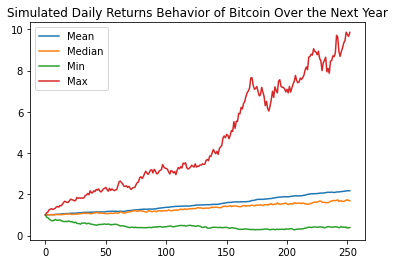

In [143]:
# Plot simulated returns over next year for BTC

df_simulated_btc_returns.plot(title="Simulated Daily Returns Behavior of Bitcoin Over the Next Year")


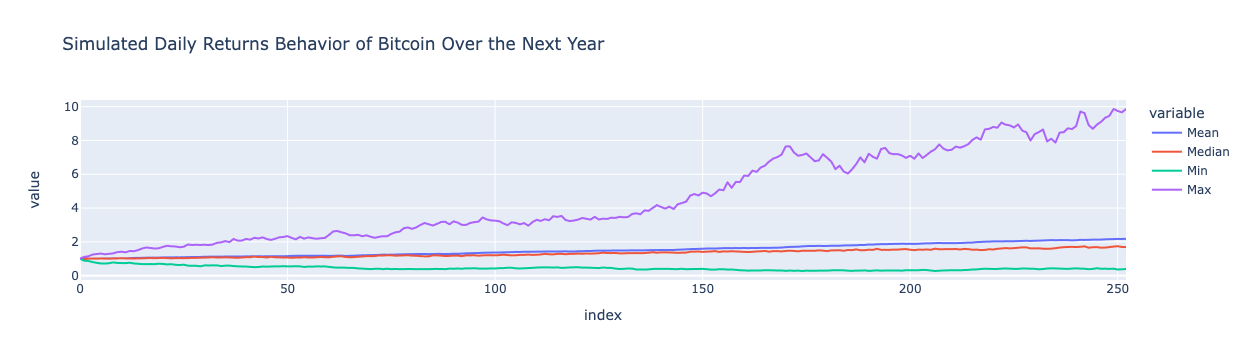

In [144]:
# Plot simulated returns over next year using plotly for Bitcoin

px.line(df_simulated_btc_returns, title="Simulated Daily Returns Behavior of Bitcoin Over the Next Year")



In [145]:
# Fetch summary statistics from the Monte Carlo simulation results for Bitcoin

btc_tbl = MC_BTC_new.summarize_cumulative_return()

# Print summary statistics
print(btc_tbl)


count           100.000000
mean              2.175669
std               1.610066
min               0.393147
25%               1.042030
50%               1.690275
75%               2.739597
max               9.854651
95% CI Lower      0.541326
95% CI Upper      5.989524
Name: 252, dtype: float64


In [146]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Bitcoin

btc_ci_lower = round(btc_tbl[8]*10000,2)
btc_ci_upper = round(btc_tbl[9]*10000,2)

# Print results

print(f"There is a 95% chance that an initial investment of $10,000 in Bitcoin"
      f" over the next year will end within in the range of"
      f" ${btc_ci_lower} and ${btc_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in Bitcoin over the next year will end within in the range of $5413.26 and $59895.24.


In [147]:
# Set initial investment for Bitcoin

btc_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money

btc_cumulative_pnl = btc_initial_investment * df_simulated_btc_returns

# Display sample data
btc_cumulative_pnl.head()

Mean        Median           Min           Max
0  10000.000000  10000.000000  10000.000000  10000.000000
1   9993.673339   9950.227772   8858.515984  11112.596996
2  10096.004529  10093.116819   8680.152129  11421.345334
3  10110.658339  10115.673494   8056.893836  12477.764922
4  10143.414256  10085.990491   7604.110735  12791.154033

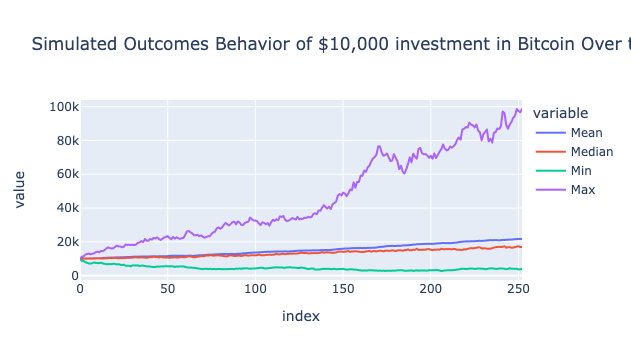

In [153]:
 # Use the 'plot' function to create a chart of the simulated profits/losses
    
px.line(btc_cumulative_pnl, title="Simulated Outcomes Behavior of $10,000 investment in Bitcoin Over the Next Year")

